In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# POC

In [2]:
# Imagine these are trimmed to regions which are of interest and concatenated

length = 24

clone1 =    "GTACTTGTCGATCGATAGCTAGGC"
clone2 =    "GTACTGGACGATCGATATCTAGGC"
clone3 =    "GTACCGGACGATCGATATTTAGGC"
clone4 =    "GTACTGTACGATCGATATTTAGGC"
clone5 =    "GTACCTGTCGATCGATAGCTAGGC"

test1 =     "GTACTTGTCGATCAATAGCTAGGC"  # clone 1
test2 =     "GTACTGGTCGAACAATAGCTAGGC"  # clone 1
test3 =     "GTACCTGACGATCGATATGTAGGC"  # clone 3
test4 =     "GTACCTGTCGATCAATAGCTAGGC"  # clone 5 or 1
test5 =     "GTACTAGACGATCGTAATCTAGGC"  # clone 2
test6 =     "ATGCTGTATTGTCTGATGGATCGT"  # random seq
test7 =     "TGCAGTCGATTCGATTAAAGCTAT"  # random seq

In [3]:
def all_same(*args):
    return all(var == args[0] for var in args[1:])

def gaussian(x, mean, std_dev):
    """
    Gaussian (normal) distribution function.

    Parameters:
    - x: Input values.
    - mean: Mean (center) of the distribution.
    - std_dev: Standard deviation (spread or width) of the distribution.

    Returns:
    - Gaussian distribution values corresponding to the input x.
    """
    return 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2))


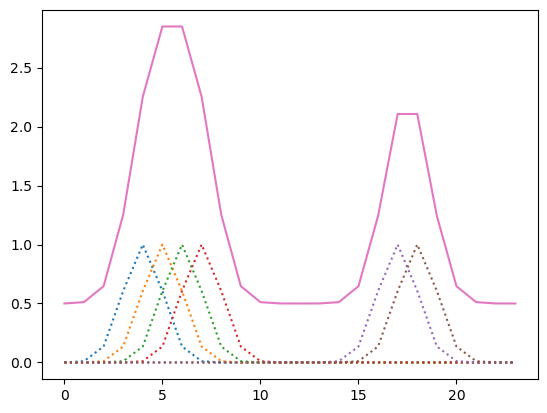

[0.5003392045339516, 0.5114482010492967, 0.6467834690559295, 1.253310402115391, 2.2529749394874883, 2.8483966026618797, 2.8483966026618797, 2.2529749394874883, 1.253310402115391, 0.6467834690559422, 0.5114482010722067, 0.5003392197868288, 0.5000074837892137, 0.5003392045339643, 0.5114444591890548, 0.6464442797748676, 1.241865942949246, 2.106530659712633, 2.106530659712633, 1.241865942949246, 0.646444279774855, 0.5114444591661448, 0.5003391892810746, 0.5000037418831518]


In [4]:
weight_arr = np.zeros(length)
x_values = np.linspace(0, length - 1, length)
std_dev_value = 1

index = 0
for char1, char2, char3, char4, char5 in zip(clone1, clone2, clone3, clone4, clone5):
    if not all_same(char1, char2, char3, char4, char5):
        weight_window = gaussian(x_values, index, std_dev_value)
        normalised = weight_window / np.max(weight_window)
        plt.plot(normalised, linestyle=':')
        weight_arr += normalised
    index += 1

# weight_arr /= np.max(weight_arr)
weight_arr += 0.5
weight_arr = list(weight_arr)

plt.plot(weight_arr)
plt.show()

print(weight_arr)

In [5]:

def get_vector(sequence: str):
    vector = [0 for _ in range(5)]
    for i, char in enumerate(sequence):
        if char != clone1[i]:
            vector[0] += weight_arr[i]
        if char != clone2[i]:
            vector[1] += weight_arr[i]
        if char != clone3[i]:
            vector[2] += weight_arr[i]
        if char != clone4[i]:
            vector[3] += weight_arr[i]
        if char != clone5[i]:
            vector[4] += weight_arr[i]
    return np.array(vector)

clone1_vector = get_vector(clone1)
clone2_vector = get_vector(clone2)
clone3_vector = get_vector(clone3)
clone4_vector = get_vector(clone4)
clone5_vector = get_vector(clone5)

In [6]:
def cosine_sim(vector_a, vector_b):
    # Calculate the dot product
    dot_product = np.dot(vector_a, vector_b)

    # Calculate the magnitudes (Euclidean norms) of the vectors
    magnitude_a = np.linalg.norm(vector_a)
    magnitude_b = np.linalg.norm(vector_b)

    # Calculate cosine similarity
    cosine_similarity = dot_product / (magnitude_a * magnitude_b)
    return cosine_similarity

def compare_vector(sequence):
    test_vector = get_vector(sequence)
    
    compare_index = np.array([
                np.linalg.norm(test_vector - clone1_vector), 
                np.linalg.norm(test_vector - clone2_vector), 
                np.linalg.norm(test_vector - clone3_vector), 
                np.linalg.norm(test_vector - clone4_vector), 
                np.linalg.norm(test_vector - clone5_vector)])
    
    clone_type = np.argmin(compare_index)
    confidence_index = 1 / np.sum(compare_index)
    print(clone_type + 1)
    print(confidence_index)
    print(compare_index)
    print("---------------------")

print("TEST1")
compare_vector(test1)
print("TEST2")
compare_vector(test2)
print("TEST3")
compare_vector(test3)
print("TEST4")
compare_vector(test4)
print("TEST5")
compare_vector(test5)
print("TEST6")
compare_vector(test6)
print("TEST7")
compare_vector(test7)
print("CLONE1")
compare_vector(clone1)
print("CLONE2")
compare_vector(clone2)
print("CLONE3")
compare_vector(clone3)
print("CLONE4")
compare_vector(clone4)
print("CLONE5")
compare_vector(clone5)

TEST1
1
0.015620618088866545
[ 1.11879247 16.37784355 19.48213569 22.10190772  4.9372739 ]
---------------------
TEST2
1
0.01801453487379492
[ 6.31450271 10.42871796 13.87619798 16.31354166  8.57777071]
---------------------
TEST3
3
0.018291913989316188
[11.913581    9.46492974  8.56987153 13.46421871 11.25636371]
---------------------
TEST4
5
0.014795997210922571
[ 5.37454001 18.12032531 19.47858205 23.4936069   1.11879247]
---------------------
TEST5
2
0.018005537996033667
[13.06613821  7.12968298  9.8468894  10.9861135  14.50964414]
---------------------
TEST6
4
0.00706758481399194
[29.85306914 29.09904509 27.92965538 24.59685776 30.01242316]
---------------------
TEST7
5
0.004909373229195938
[39.68166083 43.19243081 41.84334372 40.09406949 38.88048459]
---------------------
CLONE1
1
0.01595322929177518
[ 0.         16.1173593  19.37657311 22.15149617  5.03780512]
---------------------
CLONE2
2
0.019443614359692166
[16.1173593   0.          7.55372485  9.9375843  17.82209856]
------

# POC 2

In [7]:
def get_vector(sequence: str):
    vector = [0 for _ in range(length)]
    for i, char in enumerate(sequence):
        if char != clone1[i]:
            vector[0] += weight_arr[i]
        if char != clone2[i]:
            vector[1] += weight_arr[i]
        if char != clone3[i]:
            vector[2] += weight_arr[i]
        if char != clone4[i]:
            vector[3] += weight_arr[i]
        if char != clone5[i]:
            vector[4] += weight_arr[i]
    return np.array(vector)

clone1_vector = get_vector(clone1)
clone2_vector = get_vector(clone2)
clone3_vector = get_vector(clone3)
clone4_vector = get_vector(clone4)
clone5_vector = get_vector(clone5)

# Actual Data

In [8]:
clone_3D7 = "TGTCTTGGTAAATGTGCTCATGTGTTTAAACTTATTTTTAAAGAGATTAAGGATAATATTTTTATTTATATTTTAAGTATTATTTATTTAAGTGTATGTGTAATGAATAAAATTTTTGCTAAAAGAACTTTAAACAAAATTGGTAACTATAGTTTTGTAACATCCGAAACTCACAACT"
clone_DD2 = "TGTCTTGGTAAATGTGCTCATGTGTTTAAACTTATTTTTAAAGAGATTAAGGATAATATTTTTATTTATATTTTAAGTATTATTTATTTAAGTGTATGTGTAATTGAAACAATTTTTGCTAAAAGAACTTTAAACAAAATTGGTAACTATAGTTTTGTAACATCCGAAACTCACAACT"
clone_7G8 = "TGTCTTGGTAAATGTGCTCATGTGTTTAAACTTATTTTTAAAGAGATTAAGGATAATATTTTTATTTATATTTTAAGTATTATTTATTTAAGTGTAAGTGTAATGAATACAATTTTTGCTAAAAGAACTTTAAACAAAATTGGTAACTATAGTTTTGTAACATCCGAAACTCACAACT"

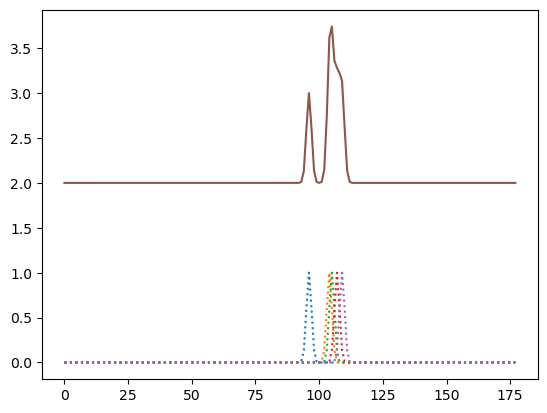

In [9]:
length = len(clone_3D7)

weight_arr = np.zeros(length)
x_values = np.linspace(0, length - 1, length)
std_dev_value = 1

index = 0
for char1, char2, char3 in zip(clone_3D7, clone_DD2, clone_7G8):
    if not all_same(char1, char2, char3):
        weight_window = gaussian(x_values, index, std_dev_value)
        normalised = weight_window / np.max(weight_window)
        plt.plot(normalised, linestyle=':')
        weight_arr += normalised
    index += 1

weight_arr += 2
weight_arr = list(weight_arr)

plt.plot(weight_arr)
plt.show()

In [10]:

def get_vector(sequence: str):
    vector = [0 for _ in range(3)]
    for i, char in enumerate(sequence):
        if char != clone_3D7[i]:
            vector[0] += weight_arr[i]
        if char != clone_DD2[i]:
            vector[1] += weight_arr[i]
        if char != clone_7G8[i]:
            vector[2] += weight_arr[i]
    return np.array(vector)

clone_3D7_vector = get_vector(clone_3D7)
clone_DD2_vector = get_vector(clone_DD2)
clone_7G8_vector = get_vector(clone_7G8)


print(clone_3D7_vector)
print(clone_DD2_vector)
print(clone_7G8_vector)


[ 0.         13.77729882  6.13567447]
[13.77729882  0.         13.64162435]
[ 6.13567447 13.64162435  0.        ]


In [11]:
def compare_vector(sequence):
    test_vector = get_vector(sequence)
    
    compare_index = np.array([
                np.linalg.norm(test_vector - clone_3D7_vector), 
                np.linalg.norm(test_vector - clone_DD2_vector), 
                np.linalg.norm(test_vector - clone_7G8_vector)])
    
    clone_type = np.argmin(compare_index)
    confidence_index = 1 / np.sum(compare_index)
    return clone_type, confidence_index, compare_index

In [12]:
def run_calling(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)

    count = [0, 0, 0]
    for datum in data:
        seq = datum[2]
        clone_type, _, _ = compare_vector(seq)
        count[clone_type] += 1

    print(np.array(count) / len(data))

In [13]:
run_calling("pickle/CRT_denoised/trimmed_data_CRT3D71.pkl")
run_calling("pickle/CRT_denoised/trimmed_data_CRT3D72.pkl")

run_calling("pickle/CRT_denoised/trimmed_data_CRTDD21.pkl")
run_calling("pickle/CRT_denoised/trimmed_data_CRTDD22.pkl")

run_calling("pickle/CRT_denoised/trimmed_data_CRT7G81.pkl")
run_calling("pickle/CRT_denoised/trimmed_data_CRT7G82.pkl")

[0.91915248 0.01067208 0.07017544]
[0.92310896 0.00478942 0.07210162]
[5.46560087e-04 9.81211997e-01 1.82414429e-02]
[6.14880098e-04 9.78342557e-01 2.10425634e-02]
[0.02462164 0.01118139 0.96419697]
[0.02857466 0.00632482 0.96510052]


In [14]:
# STD: 100
# {0: 17598, 1: 273, 2: 1338}
# {0: 17731, 1: 93, 2: 1385}
# {0: 7, 1: 14364, 2: 266}
# {0: 9, 1: 14320, 2: 308}
# {0: 217, 1: 115, 2: 8522}
# {0: 253, 1: 55, 2: 8546}

# STD: 700
# {0: 17583, 1: 288, 2: 1338}
# {0: 17731, 1: 93, 2: 1385}
# {0: 7, 1: 14364, 2: 266}
# {0: 9, 1: 14320, 2: 308}
# {0: 217, 1: 117, 2: 8520}
# {0: 253, 1: 55, 2: 8546}

# STD: 1
# {0: 17728, 1: 112, 2: 1369}
# {0: 17741, 1: 82, 2: 1386}
# {0: 7, 1: 14357, 2: 273}
# {0: 9, 1: 14319, 2: 309}
# {0: 223, 1: 72, 2: 8559}
# {0: 253, 1: 54, 2: 8547}

# STD: 0.5
# {0: 17729, 1: 109, 2: 1371}
# {0: 17741, 1: 82, 2: 1386}
# {0: 7, 1: 14347, 2: 283}
# {0: 9, 1: 14319, 2: 309}
# {0: 223, 1: 62, 2: 8569}
# {0: 253, 1: 52, 2: 8549}

# STD: 0.01
# {0: 18703, 1: 109, 2: 397}
# {0: 19037, 1: 82, 2: 90}
# {0: 162, 1: 14347, 2: 128}
# {0: 211, 1: 14319, 2: 107}
# {0: 279, 1: 62, 2: 8513}
# {0: 383, 1: 52, 2: 8419}